# f1. Mutual Information

In [1]:
import os
import pandas as pd

In [2]:
DATA_PATH = '../../data/'
train = pd.read_csv(os.path.join(DATA_PATH, 'train_2.csv'), index_col=0)
# test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

train_origin = train.copy()
# test_origin = test.copy()

train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,0.000218,0.712247,0.000169,0.115591,38.458553,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## 1) Mutual Information 계산하기

In [3]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
X = train.copy()
X = X.drop('ID_LAT_LON_YEAR_WEEK', axis=1)
y = X.pop('emission')

discrete_features = X.dtypes == int

In [12]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

latitude                                         2.242567
longitude                                        2.225743
NitrogenDioxide_tropopause_pressure              0.105997
Ozone_sensor_azimuth_angle                       0.044088
UvAerosolIndex_sensor_azimuth_angle              0.043043
                                                   ...   
NitrogenDioxide_solar_zenith_angle               0.003187
Formaldehyde_HCHO_slant_column_number_density    0.002487
Cloud_solar_zenith_angle                         0.002422
SulphurDioxide_solar_zenith_angle                0.001886
Formaldehyde_cloud_fraction                      0.001778
Name: MI Scores, Length: 67, dtype: float64

## 2) MI 스코어 bar plot

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

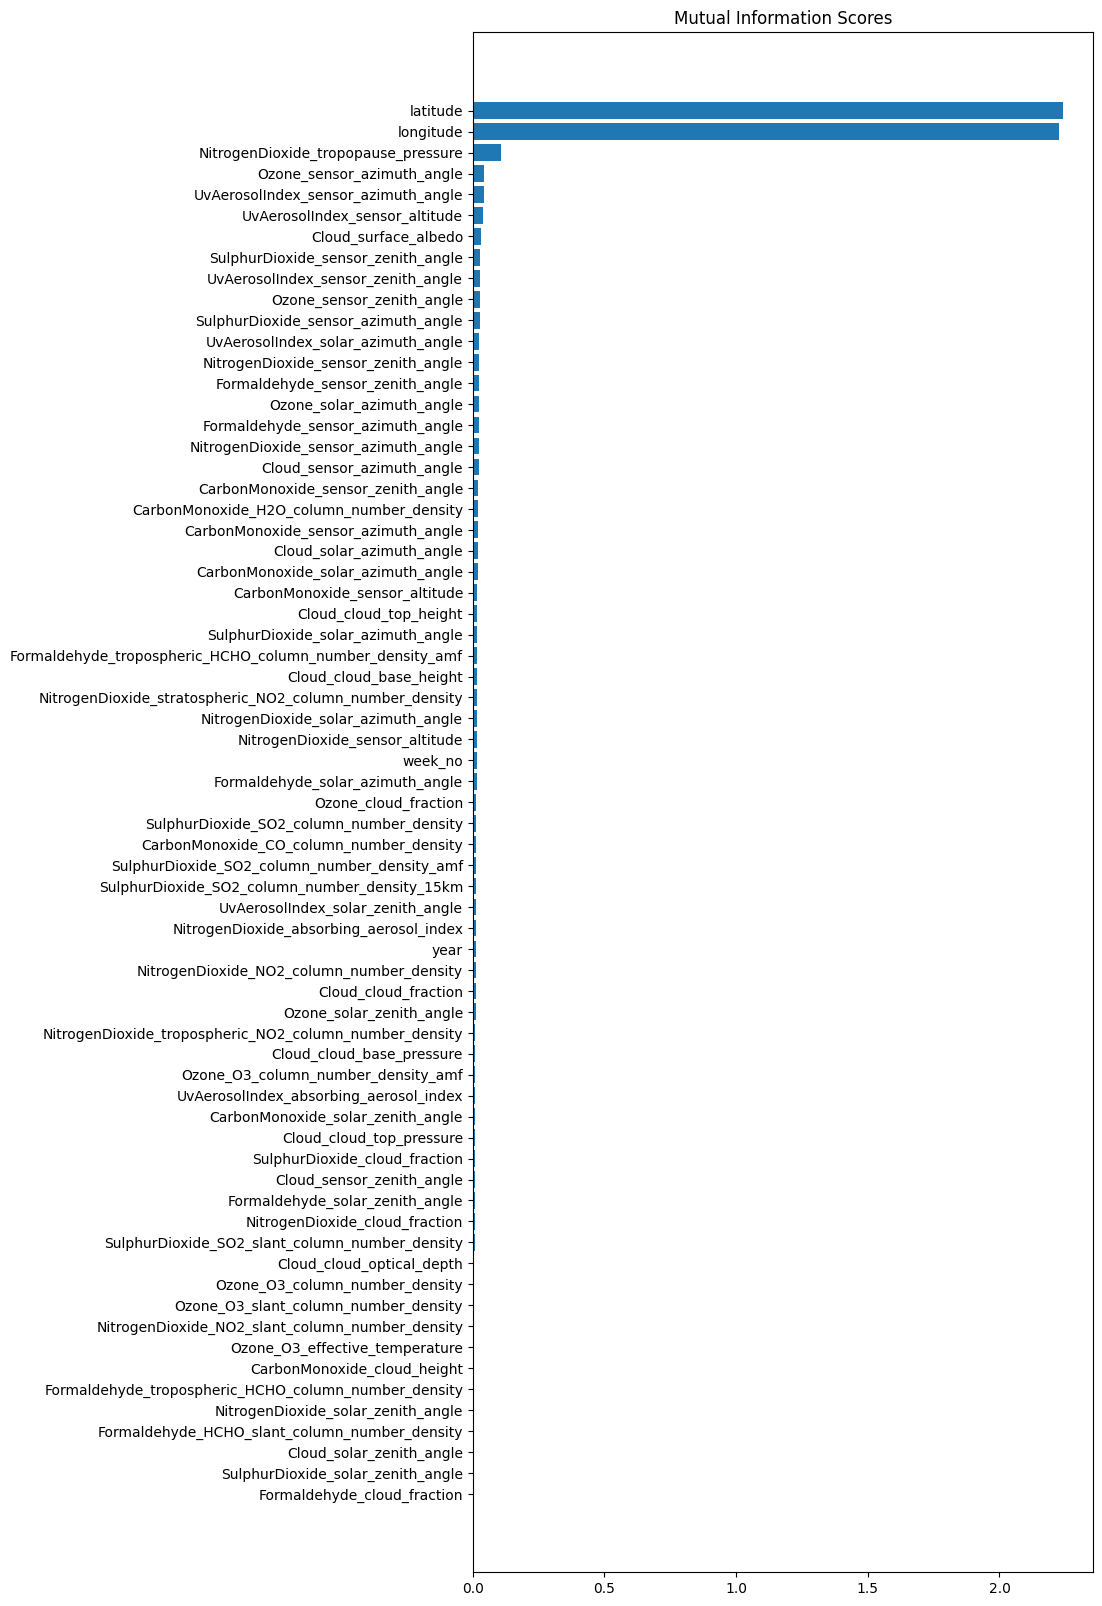

In [23]:
plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

## 3) MI 스코어 기반 feature selection
- MI 스코어가 0.01 이상인 칼럼만 추출

In [32]:
drop_columns = list(mi_scores.loc[mi_scores < 0.01].index)
drop_columns

['NitrogenDioxide_tropospheric_NO2_column_number_density',
 'Cloud_cloud_base_pressure',
 'Ozone_O3_column_number_density_amf',
 'UvAerosolIndex_absorbing_aerosol_index',
 'CarbonMonoxide_solar_zenith_angle',
 'Cloud_cloud_top_pressure',
 'SulphurDioxide_cloud_fraction',
 'Cloud_sensor_zenith_angle',
 'Formaldehyde_solar_zenith_angle',
 'NitrogenDioxide_cloud_fraction',
 'SulphurDioxide_SO2_slant_column_number_density',
 'Cloud_cloud_optical_depth',
 'Ozone_O3_column_number_density',
 'Ozone_O3_slant_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'CarbonMonoxide_cloud_height',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'NitrogenDioxide_solar_zenith_angle',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Cloud_solar_zenith_angle',
 'SulphurDioxide_solar_zenith_angle',
 'Formaldehyde_cloud_fraction']

In [36]:
train = train.drop(drop_columns, axis=1)

In [37]:
# 데이터 저장
data_name = os.path.join(DATA_PATH, 'train_f1.csv')
train.to_csv(data_name)